Estimation statistics is a branch of statistics that deals with the process of estimating population parameters based on sample data. In many real-world scenarios, it's often impractical or impossible to collect data from an entire population. Instead, researchers or analysts gather data from a subset of the population, known as a sample, and use statistical techniques to make inferences about the population as a whole.

There are two main types of estimation in statistics: point estimation and interval estimation.

Point Estimate:

A point estimate is a single value, typically derived from sample data, that serves as the best guess or approximation of a population parameter.
For example, if you want to estimate the average height of adults in a city, you might randomly sample 100 adults and calculate the mean height of this sample. This mean height would serve as your point estimate of the population mean height.
Interval Estimate:

An interval estimate provides a range of plausible values for a population parameter, rather than a single point.
Confidence intervals are the most common form of interval estimate. A confidence interval is a range of values calculated from sample data that is likely to contain the true population parameter with a certain level of confidence (e.g., 95% confidence interval).
For instance, instead of estimating the average height of adults in a city with a single number, you might calculate a 95% confidence interval. This interval would give you a range of heights within which you are 95% confident the true population mean height lies.
Another type of interval estimate is the prediction interval, which estimates a range within which future observations are likely to fall.

In [1]:
import scipy.stats as stats

def calculate_confidence_interval(sample_mean, sample_std_dev, sample_size, confidence_level=0.95):
    """
    Calculates the confidence interval for the population mean.

    Parameters:
        sample_mean (float): The mean of the sample.
        sample_std_dev (float): The standard deviation of the sample.
        sample_size (int): The size of the sample.
        confidence_level (float, optional): The desired confidence level. Default is 0.95.

    Returns:
        tuple: A tuple containing lower and upper bounds of the confidence interval.
    """
    # Calculate the standard error (standard deviation of the sampling distribution of the sample mean)
    standard_error = sample_std_dev / (sample_size ** 0.5)
    
    # Calculate the critical value (z-score) based on the confidence level
    # For a two-tailed test (which is common for confidence intervals), we need to find the critical z-value
    # corresponding to (1 - alpha/2) percentiles
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    
    # Calculate the margin of error
    margin_of_error = z_score * standard_error
    
    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return lower_bound, upper_bound

# Example usage:
sample_mean = 50  # Sample mean
sample_std_dev = 10  # Sample standard deviation
sample_size = 100  # Sample size
confidence_level = 0.95  # Confidence level

lower_bound, upper_bound = calculate_confidence_interval(sample_mean, sample_std_dev, sample_size, confidence_level)
print("Confidence Interval:", (lower_bound, upper_bound))


Confidence Interval: (48.04003601545995, 51.95996398454005)


Hypothesis testing is a statistical method used to make inferences about a population based on sample data. It involves formulating two competing hypotheses about the population parameter of interest, known as the null hypothesis (H0) and the alternative hypothesis (H1). The aim of hypothesis testing is to assess the strength of evidence against the null hypothesis and determine whether there is enough evidence to reject it in favor of the alternative hypothesis.

Here's a brief overview of the process:

Formulate Hypotheses:

Null Hypothesis (H0): This hypothesis represents the status quo or the default assumption. It often states that there is no effect or no difference between groups.
Alternative Hypothesis (H1): This hypothesis represents the researcher's claim or the effect they are interested in detecting. It could state that there is an effect, a difference between groups, or a specific relationship exists.
Choose a Significance Level (α):

The significance level, often denoted by α, determines the threshold for deciding whether to reject the null hypothesis. Commonly used values for α are 0.05 (5%) or 0.01 (1%).
Collect Data and Perform Test:

Data is collected from a sample, and a statistical test is chosen based on the nature of the data and the research question. The choice of test depends on factors such as the type of data (e.g., categorical or continuous) and the research design.
Evaluate the Evidence:

Based on the sample data and the chosen test, calculate the test statistic and its associated p-value.
The test statistic measures how far the sample estimate is from what would be expected under the null hypothesis.
The p-value represents the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming the null hypothesis is true.
Make a Decision:

If the p-value is less than the chosen significance level (α), typically 0.05, then there is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis.
If the p-value is greater than α, then there is not enough evidence to reject the null hypothesis.
Hypothesis testing is used for various purposes in research, including:

Testing scientific hypotheses and theories.
Making decisions based on data-driven evidence.
Comparing groups or treatments in experiments.
Assessing the effectiveness of interventions or policies.
Validating models or assumptions in statistical analyses.
Importance of Hypothesis Testing:

Guides Decision Making: Hypothesis testing provides a systematic framework for making decisions based on data, helping researchers draw valid conclusions.

Assesses Significance: It helps determine whether observed differences or effects in the data are statistically significant or merely due to chance.

Drives Scientific Inquiry: Hypothesis testing is fundamental to scientific research, enabling researchers to test theories, validate hypotheses, and advance knowledge.

Supports Inference: By quantifying uncertainty and providing measures of evidence, hypothesis testing supports inference about population parameters based on sample data.

Facilitates Reproducibility: Properly conducted hypothesis tests help ensure the reproducibility and reliability of research findings by providing a standardized method for evaluating evidence.

Null Hypothesis (H0):
The average weight of male college students is equal to or less than the average weight of female college students.

Alternative Hypothesis (H1):
The average weight of male college students is greater than the average weight of female college students.

This hypothesis is expressed as:

H0: μ_male ≤ μ_female
H1: μ_male > μ_female
In this hypothesis:

μ_male represents the population mean weight of male college students.
μ_female represents the population mean weight of female college students.
We will collect data from both male and female college students and conduct a statistical test, such as a one-tailed t-test or z-test, to determine whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis. If the p-value associated with the test statistic is less than the chosen significance level (α), typically 0.05, we would reject the null hypothesis and conclude that the average weight of male college students is greater than the average weight of female college students. Otherwise, if the p-value is greater than α, we would fail to reject the null hypothesis.

In [2]:
import numpy as np
from scipy.stats import ttest_ind

def two_sample_t_test(sample1, sample2, alpha=0.05):
    """
    Conducts a two-sample t-test to compare means from two populations.

    Parameters:
        sample1 (array-like): Sample data from population 1.
        sample2 (array-like): Sample data from population 2.
        alpha (float): Significance level. Default is 0.05.

    Returns:
        tuple: A tuple containing the test statistic and the p-value.
    """
    # Perform the two-sample t-test assuming equal variances
    t_statistic, p_value = ttest_ind(sample1, sample2, equal_var=True)
    
    # Compare p-value to significance level
    if p_value < alpha:
        print("Reject the null hypothesis: There is significant evidence of a difference between population means.")
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence of a difference between population means.")
    
    return t_statistic, p_value

# Example usage:
# Generate sample data for two populations
np.random.seed(42)  # for reproducibility
sample1 = np.random.normal(loc=50, scale=10, size=30)  # sample data from population 1
sample2 = np.random.normal(loc=45, scale=12, size=30)  # sample data from population 2

# Perform two-sample t-test
t_stat, p_val = two_sample_t_test(sample1, sample2)
print("Test Statistic:", t_stat)
print("p-value:", p_val)


Fail to reject the null hypothesis: There is not enough evidence of a difference between population means.
Test Statistic: 1.7456025112852054
p-value: 0.08617561619553454


Null Hypothesis (H0):

The null hypothesis represents the default assumption or status quo. It typically states that there is no effect, no difference, or no relationship in the population.
In mathematical notation, the null hypothesis is often denoted as H0.
Example:
H0: The mean score of students who study with music is equal to the mean score of students who study in silence.
Alternative Hypothesis (H1):

The alternative hypothesis represents the researcher's claim or the effect they are interested in detecting. It asserts that there is an effect, a difference, or a relationship in the population.
In mathematical notation, the alternative hypothesis is often denoted as H1 or Ha.
Example:
H1: The mean score of students who study with music is greater than the mean score of students who study in silence.
Examples:

Example 1 - Drug Efficacy:

Null Hypothesis (H0): The mean effectiveness of Drug A is equal to the mean effectiveness of Drug B.
Alternative Hypothesis (H1): The mean effectiveness of Drug A is different from the mean effectiveness of Drug B.
H0: μ_A = μ_B
H1: μ_A ≠ μ_B
Example 2 - Gender Bias:

Null Hypothesis (H0): There is no gender bias in hiring decisions.
Alternative Hypothesis (H1): There is gender bias in hiring decisions.
H0: p_male = p_female
H1: p_male ≠ p_female
Example 3 - Advertising Impact:

Null Hypothesis (H0): The mean sales before and after the advertising campaign are the same.
Alternative Hypothesis (H1): The mean sales after the advertising campaign are higher than before.
H0: μ_before = μ_after
H1: μ_after > μ_before

Formulate Hypotheses:

Define the null hypothesis (H0) and alternative hypothesis (H1) based on the research question and the claim being tested.
H0 typically represents the status quo or no effect, while H1 represents the alternative claim or effect of interest.
Choose a Significance Level (α):

Select a significance level (α), which represents the probability of making a Type I error (rejecting H0 when it is actually true).
Commonly used values for α are 0.05 (5%) or 0.01 (1%), but the choice depends on the context and the consequences of making a Type I error.
Select a Statistical Test:

Choose an appropriate statistical test based on the research question, the type of data (e.g., categorical or continuous), and the characteristics of the sample(s).
Common statistical tests include t-tests, chi-square tests, ANOVA, correlation tests, etc.
Collect Data:

Collect relevant data from the sample(s) under investigation.
Ensure that the data collection process is rigorous and unbiased to obtain reliable results.
Compute Test Statistic:

Calculate the test statistic based on the sample data and the chosen statistical test.
The test statistic measures the strength of evidence against the null hypothesis and quantifies the discrepancy between the sample data and the null hypothesis.
Determine the Critical Region:

Determine the critical region or rejection region, which consists of all possible outcomes that would lead to the rejection of the null hypothesis.
The critical region is determined based on the chosen significance level (α) and the distribution of the test statistic under the null hypothesis.
Calculate the p-value:

Calculate the p-value, which represents the probability of observing a test statistic as extreme as, or more extreme than, the one obtained from the sample data, assuming the null hypothesis is true.
The p-value provides a measure of the strength of evidence against the null hypothesis.
Make a Decision:

Compare the p-value to the significance level (α).
If the p-value is less than or equal to α, reject the null hypothesis in favor of the alternative hypothesis.
If the p-value is greater than α, fail to reject the null hypothesis.
Make a conclusion based on the decision, taking into account the context of the problem and the consequences of the decision.
Interpret Results:

Interpret the results of the hypothesis test in the context of the research question and the claims being tested.
Communicate the findings clearly, including any limitations or assumptions of the analysis.

The p-value, or probability value, is a crucial concept in hypothesis testing. It quantifies the strength of evidence against the null hypothesis and helps researchers make decisions about whether to reject or fail to reject the null hypothesis based on sample data. Below is a definition of the p-value and an explanation of its significance in hypothesis testing:

Definition:
The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the one obtained from the sample data, assuming the null hypothesis is true.

Significance in Hypothesis Testing:

Measures Evidence Against the Null Hypothesis:

The p-value provides a measure of the strength of evidence against the null hypothesis.
A small p-value suggests that the observed data are unlikely to have occurred if the null hypothesis were true, indicating strong evidence against the null hypothesis.
Conversely, a large p-value suggests that the observed data are reasonably likely to have occurred even if the null hypothesis were true, indicating weak evidence against the null hypothesis.
Decision Rule:

In hypothesis testing, the researcher sets a significance level (α), typically 0.05 or 0.01.
If the p-value is less than or equal to α, the researcher rejects the null hypothesis in favor of the alternative hypothesis, indicating that the observed results are statistically significant.
If the p-value is greater than α, the researcher fails to reject the null hypothesis, indicating that the observed results are not statistically significant.
Interpretation:

The p-value provides context for interpreting the results of hypothesis testing.
A small p-value suggests that the observed results are unlikely to occur by random chance alone, supporting the alternative hypothesis.
A large p-value suggests that the observed results are reasonably likely to occur by random chance alone, providing weak evidence against the null hypothesis.
Effect Size vs. Significance:

While the p-value indicates whether an effect is statistically significant, it does not provide information about the size or practical significance of the effect.
Researchers should consider both statistical significance (as indicated by the p-value) and effect size when interpreting the results of hypothesis testing.

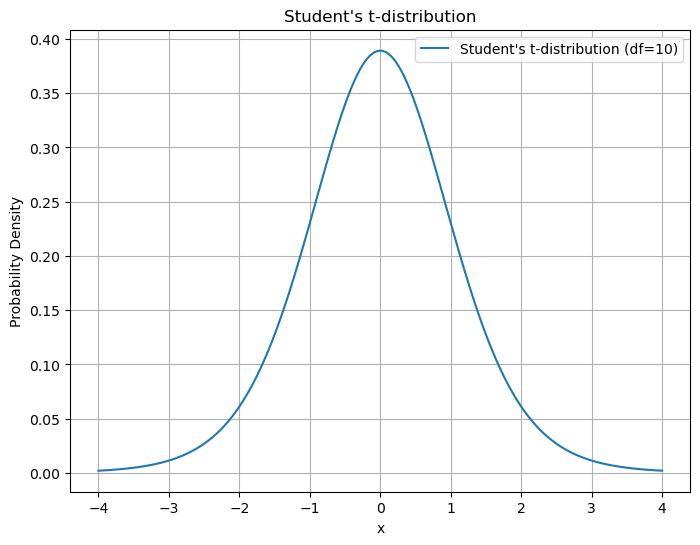

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set degrees of freedom
degrees_of_freedom = 10

# Generate x values for the plot
x = np.linspace(-4, 4, 1000)

# Calculate the probability density function (PDF) of the Student's t-distribution
pdf = stats.t.pdf(x, df=degrees_of_freedom)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Student\'s t-distribution (df={degrees_of_freedom})')
plt.title('Student\'s t-distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np
from scipy.stats import ttest_ind

def two_sample_t_test(sample1, sample2):
    """
    Performs a two-sample t-test for independent samples.

    Parameters:
        sample1 (array-like): First sample data.
        sample2 (array-like): Second sample data.

    Returns:
        float: t-statistic
        float: p-value
    """
    # Perform two-sample t-test assuming equal variances
    t_statistic, p_value = ttest_ind(sample1, sample2, equal_var=True)
    return t_statistic, p_value

# Generate two random samples of equal size
sample_size = 30
sample1 = np.random.normal(loc=50, scale=10, size=sample_size)  # Sample 1
sample2 = np.random.normal(loc=45, scale=12, size=sample_size)  # Sample 2

# Perform two-sample t-test
t_statistic, p_value = two_sample_t_test(sample1, sample2)

# Display results
print("Two-Sample T-Test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Two-Sample T-Test Results:
t-statistic: 1.995791573956775
p-value: 0.050659819552029646


Student's t-distribution, often referred to simply as the t-distribution, is a probability distribution that is similar to the normal distribution but with heavier tails. It is commonly used in statistical inference for hypothesis testing and constructing confidence intervals, particularly when the sample size is small or when the population standard deviation is unknown.

Here are key characteristics and when to use the t-distribution:

Characteristics of the t-Distribution:

Shape: The shape of the t-distribution depends on the degrees of freedom parameter (df). As the degrees of freedom increase, the t-distribution approaches the standard normal distribution.
Heavier Tails: Compared to the normal distribution, the t-distribution has heavier tails, meaning it has more probability in the tails and less in the center.
Symmetric: Like the normal distribution, the t-distribution is symmetric around its mean.
When to Use the t-Distribution:

Small Sample Sizes: When dealing with small sample sizes (typically n < 30), the sample standard deviation may not accurately estimate the population standard deviation. In such cases, the t-distribution provides a better approximation of the sampling distribution of the sample mean.
Unknown Population Standard Deviation: When the population standard deviation is unknown, the t-distribution is used instead of the normal distribution to construct confidence intervals and perform hypothesis tests.
Estimating Population Parameters: The t-distribution is commonly used for estimating population parameters, such as the population mean or the difference between two population means, when working with small samples.
Examples of When to Use the t-Distribution:

Estimating Population Mean: Suppose you want to estimate the average height of students in a school using a small sample of 15 students. Since the population standard deviation is unknown and the sample size is small, you would use the t-distribution to construct a confidence interval for the population mean height.
Comparing Means of Two Groups: If you want to compare the average test scores of two groups of students, each with a small sample size, you would use the t-distribution to perform a two-sample t-test for independent samples.

The t-statistic is a measure used in hypothesis testing to assess the significance of the difference between a sample mean and a population mean, or the difference between two sample means. It quantifies how many standard errors the sample mean is away from the population mean (in the case of one-sample t-test) or how many standard errors the difference between two sample means is away from zero (in the case of a two-sample t-test).

The formula for the t-statistic depends on the context of the hypothesis test being performed:

One-Sample t-Test:
For a one-sample t-test comparing the mean of a single sample to a known or hypothesized population mean, the formula for the t-statistic is:

�
=
�
ˉ
−
�
�
�
t= 
n
​
 
s
​
 
x
ˉ
 −μ
​
 

Where:

�
ˉ
x
ˉ
  is the sample mean,
�
μ is the population mean under the null hypothesis,
�
s is the sample standard deviation,
�
n is the sample size.
Two-Sample t-Test (Independent Samples):
For a two-sample t-test comparing the means of two independent samples, the formula for the t-statistic is:

�
=
�
ˉ
1
−
�
ˉ
2
�
1
2
�
1
+
�
2
2
�
2
t= 
n 
1
​
 
s 
1
2
​
 
​
 + 
n 
2
​
 
s 
2
2
​
 
​
 
​
 
x
ˉ
  
1
​
 − 
x
ˉ
  
2
​
 
​
 

Where:

�
ˉ
1
x
ˉ
  
1
​
  and 
�
ˉ
2
x
ˉ
  
2
​
  are the sample means of the two samples,
�
1
s 
1
​
  and 
�
2
s 
2
​
  are the sample standard deviations of the two samples,
�
1
n 
1
​
  and 
�
2
n 
2
​
  are the sample sizes of the two samples.

To estimate the population mean revenue with a 95% confidence interval, we can use the formula for the confidence interval of the population mean when the population standard deviation is known. Since we're given the sample mean (
�
ˉ
=
$
500
x
ˉ
 =$500), the sample standard deviation (
�
=
$
50
s=$50), and the sample size (
�
=
50
n=50), we can calculate the confidence interval using the formula:

Confidence Interval
=
�
ˉ
±
�
×
�
�
Confidence Interval= 
x
ˉ
 ±Z× 
n
​
 
s
​
 

Where:

�
ˉ
x
ˉ
  is the sample mean (given as $500),
�
s is the sample standard deviation (given as $50),
�
n is the sample size (given as 50),
�
Z is the critical value from the standard normal distribution corresponding to the desired confidence level. For a 95% confidence interval, 
�
Z is approximately 1.96.
Now, let's calculate the confidence interval:

Confidence Interval
=
500
±
1.96
×
50
50
Confidence Interval=500±1.96× 
50
​
 
50
​
 

Confidence Interval
=
500
±
1.96
×
50
50
Confidence Interval=500±1.96× 
50
​
 
50
​
 

Confidence Interval
=
500
±
1.96
×
50
50
Confidence Interval=500±1.96× 
50
​
 
50
​
 

Confidence Interval
=
500
±
1.96
×
50
7.07
Confidence Interval=500±1.96× 
7.07
50
​
 

Confidence Interval
=
500
±
1.96
×
7.07
Confidence Interval=500±1.96×7.07

Confidence Interval
=
500
±
13.85
Confidence Interval=500±13.85

Therefore, the 95% confidence interval for the population mean revenue is approximately 
$
500
±
$
13.85
$500±$13.85.

Given:

Sample mean (
�
ˉ
x
ˉ
 ) = 8 mmHg
Sample standard deviation (
�
s) = 3 mmHg
Sample size (
�
n) = 100
Population mean under the null hypothesis (
�
0
μ 
0
​
 ) = 10 mmHg
Significance level (
�
α) = 0.05
We can calculate the t-statistic using the formula:

�
=
�
ˉ
−
�
0
�
�
t= 
n
​
 
s
​
 
x
ˉ
 −μ 
0
​
 
​
 

Let's calculate the t-statistic:

�
=
8
−
10
3
100
t= 
100
​
 
3
​
 
8−10
​
 

�
=
−
2
3
10
t= 
10
3
​
 
−2
​
 

�
=
−
2
0.3
t= 
0.3
−2
​
 

�
=
−
6.67
t=−6.67

Now, we compare the calculated t-statistic to the critical value from the t-distribution at the specified significance level (
�
=
0.05
α=0.05) and degrees of freedom (
�
�
=
�
−
1
=
100
−
1
=
99
df=n−1=100−1=99).

Since the alternative hypothesis is that the mean decrease in blood pressure is less than 10 mmHg, we are conducting a one-tailed test. We look up the critical value for a one-tailed test with 
�
�
=
99
df=99 and 
�
=
0.05
α=0.05 and find that 
�
critical
=
−
1.660
t 
critical
​
 =−1.660.

Since 
�
=
−
6.67
<
�
critical
=
−
1.660
t=−6.67<t 
critical
​
 =−1.660, we reject the null hypothesis.